# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

Продукт - развлекательное приложение Procrastinate Pro+. Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложено большое количество денег без ощутимого результата. Необходимо определить причины неэффективности привлечения пользователей и сформировать рекомендации для отдела маркетинга для повышения эффективности.

В распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Будем считать, что мы смотрим данные 1-го ноября 2019 года и что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

**План работы**

- **Шаг 1. Загрузим данные и подготовим их к анализу**
   Путь к файлам:
      -   /datasets/visits_info_short.csv 
      -   /datasets/orders_info_short.csv 
      -   /datasets/costs_info_short.csv
 
- **Шаг 2. Задание функций для расчета и анализа LTV, ROI, удержания и конверсии**


- **Шаг 3. Проведем исследовательский анализ данных**
   Построим профили пользователей. Определии минимальную и максимальную дату привлечения пользователей.
   Выясним:
      - Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
      - Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
      - По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

- **Шаг 4. Маркетинг**
   Выясним:
      - Сколько денег потратили? Всего / на каждый источник / по времени
      - Сколько в среднем стоило привлечение одного покупателя из каждого источника?

- **Шаг 5. Оценим окупаемость рекламы для привлечения пользователей**
   С помощью LTV и ROI:
      - Проанализируем общую окупаемость рекламы;
      - Проанализируем окупаемость рекламы с разбивкой по устройствам;
      - Проанализируем окупаемость рекламы с разбивкой по странам;
      - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

   Выясним:
      - Окупается ли реклама, направленная на привлечение пользователей в целом? 
      - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
      - Чем могут быть вызваны проблемы окупаемости? Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.


- **Шаг 6. Напишем выводы**
      - Выделим причины неэффективности привлечения пользователей;
      - Сформируем рекомендации для отдела маркетинга для повышения эффективности.

- **Описание данных**

   Таблица `visits_log_short` (лог сервера с информацией о посещениях сайта):

    - `User Id` — уникальный идентификатор пользователя
    - `Device` — категория устройства пользователя
    - `Session start` — дата и время начала сессии
    - `Session End` — дата и время окончания сессии
    - `Channel` — идентификатор рекламного источника, из которого пришел пользователь
    - `Region` - страна пользователя

  Таблица `orders_log_short` (информация о заказах):

    - `User Id` — уникальный id пользователя, который сделал заказ
    - `Event Dt` — дата и время покупки
    - `Revenue` — выручка

  Таблица `costs_short` (информация о затратах на маркетинг):

    - `Channel` — идентификатор рекламного источника
    - `Dt` — дата
    - `Costs` — затраты на этот рекламный источник в этот день

## Загрузка данных и подготовка их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

### Обзор данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# чтение файлов с данными и сохранение их в переменных
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('C:/Users/tatar/downloads/visits_info_short.csv')
    
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('C:/Users/tatar/downloads/orders_info_short.csv')
    
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('C:/Users/tatar/downloads/costs_info_short.csv')
    
# вывод первых 5 строк таблиц
display(visits.head()) 
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# получение общей информации о данных
visits.info()
print('\n')
orders.info()
print('\n')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Colum

In [4]:
# подсчет дубликатов в таблицах
print(visits.duplicated().sum()) 
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


**Выводы**

* Необходимо заменить названия столбцов, привести их к нижнему регистру и правильному стилю;
* Необходимо привести к правильному типу данные в столбцах, содержащих информацию о дате и времени;
* Пропуски отсутствуют;
* Дубликаты отсутствуют.

### Предобработка данных

Заменим названия столбцов, приведём к нижнему регистру и правильному стилю.

In [5]:
# переименование столбцов
visits = visits.rename(columns={'User Id': 'user_id', 'Session Start': 'session_start', 'Session End': 'session_end'}) 
visits.rename(str.lower, axis='columns', inplace=True) 
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt'}) 
orders.rename(str.lower, axis='columns', inplace=True)
costs.rename(str.lower, axis='columns', inplace=True)

# проверка
print(visits.columns) 
print(orders.columns) 
print(costs.columns) 

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


Преобразуем данные, содержащие информацию о дате и времени в формат `datetime`.

In [6]:
# изменение типа данных, содержащих информацию о дате и времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Выводы**

Таким образом, мы сделали следующее:
* Заменили названия столбцов, привели их к нижнему регистру и правильному типу;
* Привели к правильному типу данные в столбцах, содержащих информацию о дате и времени.

## Задание функций для расчета и анализа LTV, ROI, удержания и конверсии

Используем функции, с которыми познакомились в теоретических уроках.

### Функция для создания пользовательских профилей

Чтобы составить профили пользователей необходимо сделать следующее:

- Получить данные журнала посещений.
- Для каждого пользователя определить дату и время первой сессии.
- Для каждого пользователя определить соответствующие задаче параметры первой сессии. Например, источник перехода на сайт.
- Для каждого пользователя определить стоимость привлечения.
- Посчитать количество привлечённых пользователей для каждой даты и источника и сопоставить данные.

Составим функцию `get_profiles()`.

Её аргументы: 

- `visits` — данные журнала посещений,
- `orders` — данные журнала покупок,
- `costs` — данные о затратах на маркетинг.

In [7]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для расчета и анализа Retention Rate

Чтобы рассчитать Retention Rate (коэффициент удержания), нужно разделить количество активных пользователей на текущий день на количество активных пользователей на первый день. В когортном анализе расчёт усложняется, потому что операцию нужно провести со всеми когортами.

Необходимо сделать следующее:
- Получить журнал сессий и профили пользователей.
- Объединить данные сессий с профилями.
- Рассчитать лайфтайм пользователя для каждой сессии.
- Построить таблицу удержания. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
- Вычислить размеры когорт и занести результаты в отдельную таблицу.
- Объединить таблицы размеров когорт и удержания.
- Разделить каждую «ячейку» таблицы удержания на соответствующий размер когорты.

Составим функцию для расчёта коэффициента удержания `get_retention()`. 

Её аргументы: 

- `profiles` — профили пользователей,
- `visits` — данные журнала сессий,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `dimensions=[]` — группировка по желаемым признакам,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

In [8]:
def get_retention(profiles, visits, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета и анализа Conversion Rate

Чтобы рассчитать Conversion Rate (коэффициент конверсии), нужно разделить накопленное количество новых покупателей на текущий день на количество активных пользователей на первый день. В когортном анализе расчёт усложняется, потому что операцию нужно провести со всеми когортами.

Необходимо сделать следующее:
- Получить пользовательские профили и данные о покупках.
- Найти дату и время первой покупки для каждого пользователя.
- Добавить данные о покупках в профили.
- Рассчитать лайфтайм пользователя для каждой покупки.
- Построить таблицу конверсии. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — количество уникальных идентификаторов пользователей.
- Посчитать сумму с накоплением для каждой строки таблицы конверсии.
- Вычислить размеры когорт и занести результаты в отдельную таблицу.
- Объединить таблицы размеров когорт и конверсии.
- Разделить каждую «ячейку» таблицы конверсии на соответствующий размер когорты.

Составим функцию для расчёта коэффициента конверсии `get_conversion()`. 

Её аргументы: 

- `profiles` — профили пользователей,
- `orders` — данные журнала покупок,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `dimensions=[]` — группировка по желаемым признакам,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

In [9]:
def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # найдем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавим данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитаем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # построим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # посчитаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединим таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # разделим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключим все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстановим размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получим таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получим таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета и анализа LTV и ROI

Чтобы рассчитать LTV (Lifetime Value) и ROI (Return On Investments), понадобятся профили пользователей и данные о стоимости совершённых покупок. Для расчета ROI нам понадобится для начала рассчитать CAC (Customer Aquisition Cost).

Необходимо сделать следующее:
- Получить пользовательские профили и данные о покупках.
- Добавить данные о покупках в профили.
- Рассчитать лайфтайм пользователя для каждой покупки.
- Построить таблицу выручки. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — выручка.
- Посчитать сумму с накоплением для каждой строки таблицы выручки.
- Вычислить размеры когорт и занести результаты в отдельную таблицу.
- Объединить таблицы размеров когорт и выручки.
- Вычислить CAC: разделить рекламные расходы на количество новых пользователей.
- Добавить CAC для каждой даты привлечения и источника в профили.
- Посчитать LTV: разделить каждую «ячейку» таблицы выручки на соответствующий размер когорты.
- Посчитать ROI: разделить LTV на CAC.

Составим функцию для расчёта «пожизненной ценности» клиента и окупаемости инвестиций `get_ltv()`. 

Её аргументы: 

- `profiles` — профили пользователей,
- `orders` — данные журнала покупок,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `dimensions=[]` — группировка по желаемым признакам,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

In [10]:
def get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # добавим в профили время совершения покупок и выручку
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # рассчитаем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # построим таблицу выручки
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # посчитаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединим размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # посчитаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для сглаживания фрейма

Составим функцию для сглаживания фрейма `filter_data()`. Она нам понадобится при последующей визуализации графиков динамических метрик.

Её аргументы: 

- `df` — нужный нам датафрейм,
- `window` — ширина окна сглаживания.

In [11]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция для визуализации удержания

Составим функцию для визуализации удержания `plot_retention()`.

Её аргументы: 

- `retention` — таблица удержания,
- `retention_history` — таблица динамики удержания,
- `horizon` — день жизни, по которому хотим изучить динамику удержания,
- `window=7` — ширина окна сглаживания.

In [12]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии

Составим функцию для визуализации конверсии `plot_conversion()`.

Её аргументы: 

- `conversion` — таблица конверсии,
- `conversion_history` — таблица динамики конверсии,
- `horizon` — день жизни, по которому хотим изучить динамику конверсии,
- `window=7` — ширина окна сглаживания.

In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

Составим функцию для визуализации LTV и ROI `plot_ltv_roi()`.

Её аргументы: 

- `ltv` — таблица LTV,
- `ltv_history` — таблица динамики LTV,
- `roi` — таблица ROI,
- `roi_history` — таблица динамики ROI,
- `horizon` — день жизни, по которому хотим изучить динамику LTV и ROI,
- `window=7` — ширина окна сглаживания.

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Получим профили пользователей. Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях, покупках и тратах на рекламу Procrastinate Pro+.

In [15]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную дату привлечения пользователей.

In [16]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Теперь можно приступать к анализу.

Выясним из каких стран приходят посетители и какие страны дают больше всего платящих пользователей.

In [17]:
# формирование сводной таблицы c уникальными пользователями с разбивкой по странам
profiles_country_breakdown = (
    profiles.pivot_table(
        index='region',  # страны, из которых приходят пользователи
        values='user_id',  # ID пользователей
        aggfunc='nunique'  # подсчёт уникальных значений
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
profiles_country_breakdown['ratio'] = round(
    profiles_country_breakdown['unique_users'] / 
    profiles_country_breakdown['unique_users'].sum(), 3)

# формирование сводной таблицы c платящими пользователями с разбивкой по странам
paying_profiles_country_breakdown = (
    profiles.loc[profiles['payer'] == True].pivot_table(
        index='region',  # страны, из которых приходят пользователи
        values='user_id',  # ID пользователей
        aggfunc='nunique'  # подсчёт уникальных значений
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'paying_users'})
    .reset_index()
)
paying_profiles_country_breakdown['ratio'] = round(
    paying_profiles_country_breakdown['paying_users'] / 
    profiles_country_breakdown['unique_users'], 3)

display(profiles_country_breakdown)
display(paying_profiles_country_breakdown)

,region,unique_users,ratio
0,United States,100002,0.667
1,UK,17575,0.117
2,France,17450,0.116
3,Germany,14981,0.100


,region,paying_users,ratio
0,United States,6902,0.069
1,UK,700,0.040
2,France,663,0.038
3,Germany,616,0.041


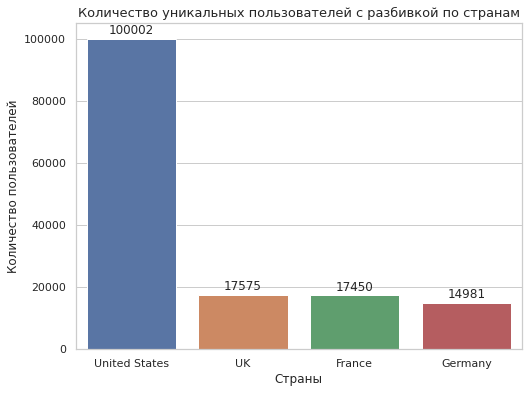

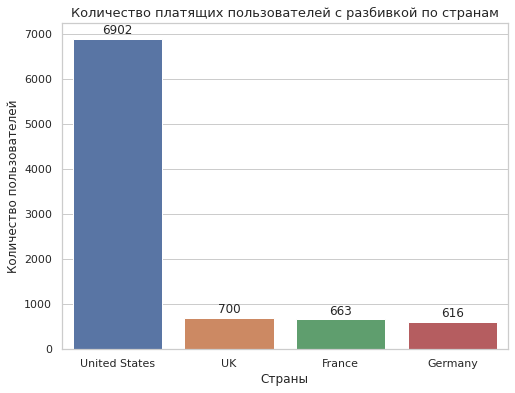

In [18]:
# построение графика количества уникальных пользователей с разбивкой по странам
plt.figure(figsize=(8,6))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='region', y='unique_users', data=profiles_country_breakdown)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество уникальных пользователей с разбивкой по странам', fontsize=13)
plt.xlabel('Страны', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# построение графика количества платящих пользователей с разбивкой по странам
plt.figure(figsize=(8,6))
plots = sns.barplot(x='region', y='paying_users', data=paying_profiles_country_breakdown)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество платящих пользователей с разбивкой по странам', fontsize=13)
plt.xlabel('Страны', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.show()

По графикам можно сказать, что наибольшее число пользователей (66.7% от общего количества, из которых 6.9% платящих пользователей) приходит с Соединенных Штатов. Великобритания, Франция и Германия дают приблизительно равное количество пользователей.

Выясним какими устройствами пользуются посетители и с каких устройств заходит больше всего платящих пользователей.

In [19]:
# формирование сводной таблицы c уникальными пользователями с разбивкой по устройствам
profiles_device_breakdown = (
    profiles.pivot_table(
        index='device',  # устройства, с которых заходят пользователи
        values='user_id',  # ID пользователей
        aggfunc='nunique'  # подсчёт уникальных значений
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
profiles_device_breakdown['ratio'] = round(
    profiles_device_breakdown['unique_users'] / 
    profiles_device_breakdown['unique_users'].sum(), 3)

# формирование сводной таблицы c платящими пользователями с разбивкой по устройствам
paying_profiles_device_breakdown = (
    profiles.loc[profiles['payer'] == True].pivot_table(
        index='device',  # устройства, с которых заходят пользователи
        values='user_id',  # ID пользователей
        aggfunc='nunique'  # подсчёт уникальных значений
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'paying_users'})
    .reset_index()
)
paying_profiles_device_breakdown['ratio'] = round(
    paying_profiles_device_breakdown['paying_users'] / 
    profiles_device_breakdown['unique_users'], 3)

display(profiles_device_breakdown)
display(paying_profiles_device_breakdown)

,device,unique_users,ratio
0,iPhone,54479,0.363
1,Android,35032,0.234
2,PC,30455,0.203
3,Mac,30042,0.200


,device,paying_users,ratio
0,iPhone,3382,0.062
1,Android,2050,0.059
2,Mac,1912,0.063
3,PC,1537,0.051


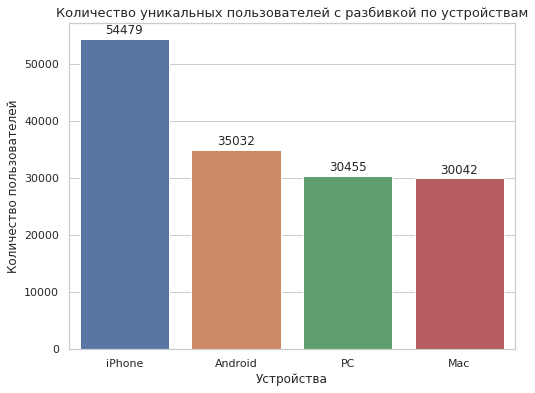

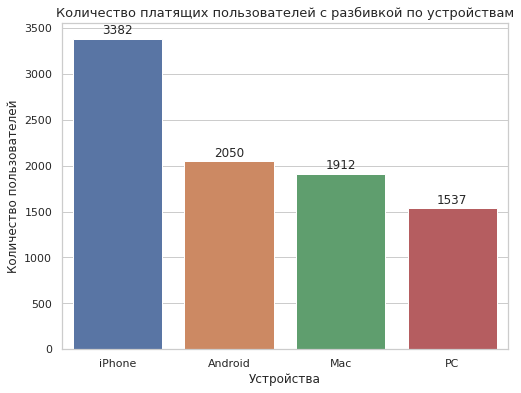

In [20]:
# построение графика количества уникальных пользователей с разбивкой по устройствам
plt.figure(figsize=(8,6))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='device', y='unique_users', data=profiles_device_breakdown)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество уникальных пользователей с разбивкой по устройствам', fontsize=13)
plt.xlabel('Устройства', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

# построение графика количества платящих пользователей с разбивкой по устройствам
plt.figure(figsize=(8,6))
plots = sns.barplot(x='device', y='paying_users', data=paying_profiles_device_breakdown)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество платящих пользователей с разбивкой по устройствам', fontsize=13)
plt.xlabel('Устройства', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

plt.show()

По графикам можно сказать, что наибольшее число пользователей (36.3% от общего количества) заходят с iPhone. Android, PC и Mac дают приблизительно равное количество пользователей. Все платформы дают приблизительно равное количество платящих пользователей (5-6%).

Выясним по каким рекламным каналам шло привлечение пользователей и какие каналы приносят больше всего платящих пользователей.

In [21]:
# формирование сводной таблицы c уникальными пользователями с разбивкой по каналам привлечения
profiles_channel_breakdown = (
    profiles.pivot_table(
        index='channel',  # рекламные источники
        values='user_id',  # ID пользователей
        aggfunc='nunique'  # подсчёт уникальных значений
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()
)
profiles_channel_breakdown['ratio'] = round(
    profiles_channel_breakdown['unique_users'] / 
    profiles_channel_breakdown['unique_users'].sum(), 3)

# формирование сводной таблицы c платящими пользователями с разбивкой по каналам привлечения
paying_profiles_channel_breakdown = (
    profiles.loc[profiles['payer'] == True].pivot_table(
        index='channel',  # рекламные источники
        values='user_id',  # ID пользователей
        aggfunc='nunique'  # подсчёт уникальных значений
    )
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'paying_users'})
    .reset_index()
)

# добавление столбца с расчетом отношения количества платящих пользователей
# к количеству пользователей с разбивкой по каналам привлечения
# через соединение таблиц
paying_profiles_channel_breakdown = paying_profiles_channel_breakdown.merge(
    profiles_channel_breakdown[['channel', 'unique_users']],
    on='channel'
)
paying_profiles_channel_breakdown['ratio'] = round(
    paying_profiles_channel_breakdown['paying_users'] / paying_profiles_channel_breakdown['unique_users'], 
    3
)
paying_profiles_channel_breakdown = (
    paying_profiles_channel_breakdown.drop(columns='unique_users')
    .sort_values(by='paying_users', ascending=False)
)

display(profiles_channel_breakdown)
display(paying_profiles_channel_breakdown)

,channel,unique_users,ratio
0,organic,56439,0.376
1,FaceBoom,29144,0.194
2,TipTop,19561,0.130
3,OppleCreativeMedia,8605,0.057
4,LeapBob,8553,0.057
5,WahooNetBanner,8553,0.057
6,RocketSuperAds,4448,0.030
7,MediaTornado,4364,0.029
8,YRabbit,4312,0.029
9,AdNonSense,3880,0.026


,channel,paying_users,ratio
0,FaceBoom,3557,0.122
1,TipTop,1878,0.096
2,organic,1160,0.021
3,WahooNetBanner,453,0.053
4,AdNonSense,440,0.113
5,RocketSuperAds,352,0.079
6,LeapBob,262,0.031
7,OppleCreativeMedia,233,0.027
8,lambdaMediaAds,225,0.105
9,YRabbit,165,0.038


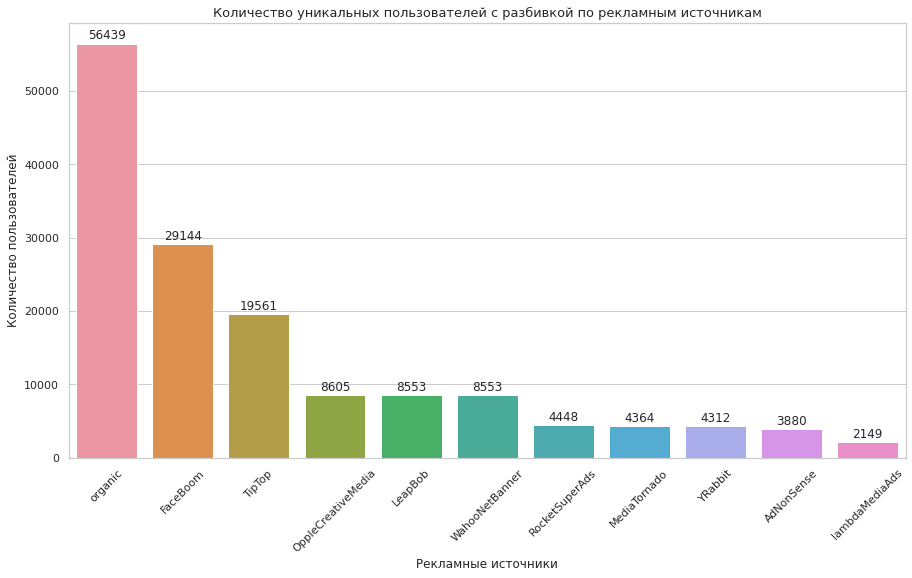

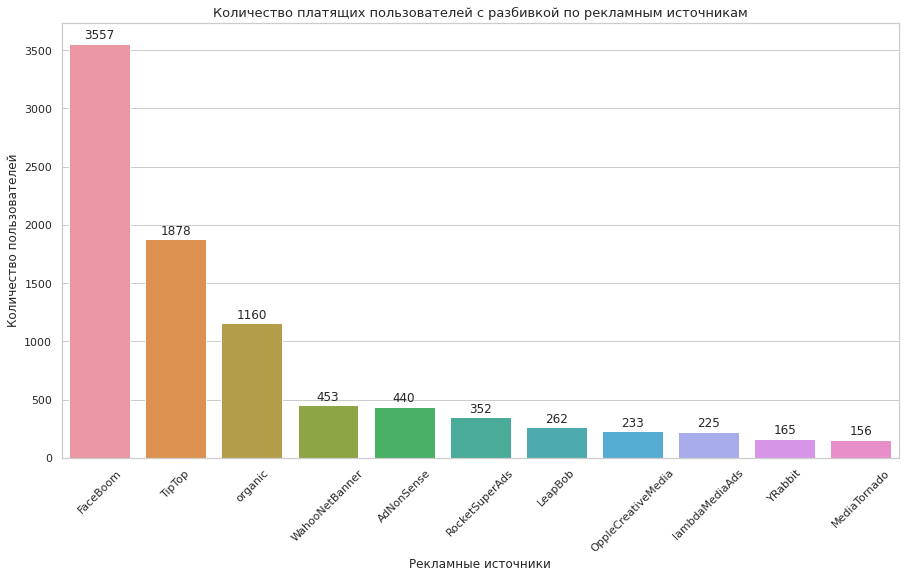

In [22]:
# построение графика количества уникальных пользователей с разбивкой по каналам привлечения
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='channel', y='unique_users', data=profiles_channel_breakdown)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество уникальных пользователей с разбивкой по рекламным источникам', fontsize=13)
plt.xlabel('Рекламные источники', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Количество пользователей', fontsize=12)

# построение графика количества платящих пользователей с разбивкой по каналам привлечения
plt.figure(figsize=(15,8))
plots = sns.barplot(x='channel', y='paying_users', data=paying_profiles_channel_breakdown)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество платящих пользователей с разбивкой по рекламным источникам', fontsize=13)
plt.xlabel('Рекламные источники', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Количество пользователей', fontsize=12)

plt.show()

С каналами привлечения ситуация не такая однозначная.

По уникальным пользователям топ-3 выглядит следующим образом:
- organic (с большим отрывом) - 37.6%,
- FaceBoom - 19.4%,
- TipTop - 13%.

По платящим пользователям топ-3 выглядит следующим образом:
- FaceBoom - 12.2%,
- TipTop - 9.6%,
- organic - 2.1%.

Остальные рекламные источники по отдельности дают значимо меньшее количество пользователей.

**Выводы**

Составим портеты пользователей
* Наибольшее количество пользователей приходит с Соединенных Штатов, с устройства iPhone, с органического трафика и через рекламные каналы FaceBoom и TipTop.
* Наибольшее количество платящих пользователей приходит с Соединенных Штатов, с устройства iPhone, через рекламные каналы FaceBoom и TipTop и с органического трафика.

## Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Определим сколько всего финансов было потрачено на маркетинг. Для этого воспользуемся данными из таблицы `costs`.

In [23]:
print('Всего потрачено на маркетинг:', round(costs['costs'].sum(), 2), '$')

Всего потрачено на маркетинг: 105497.3 $


Теперь определим сколько финансов было потрачено на маркетинг на каждый источник.

In [24]:
# формирование сводной таблицы c суммой потраченных финансов с разбивкой по каналам привлечения
costs_channel_breakdown = (
    costs.pivot_table(
        index='channel',  # рекламные источники
        values='costs',  # траты на рекламный источник
        aggfunc='sum'  # сумма трат
    )
    .sort_values(by='costs', ascending=False)
    .rename(columns={'costs': 'sum_costs'})
    .reset_index()
)
costs_channel_breakdown['ratio'] = round(
    costs_channel_breakdown['sum_costs'] / 
    costs_channel_breakdown['sum_costs'].sum(), 3)

costs_channel_breakdown

,channel,sum_costs,ratio
0,TipTop,54751.30,0.519
1,FaceBoom,32445.60,0.308
2,WahooNetBanner,5151.00,0.049
3,AdNonSense,3911.25,0.037
4,OppleCreativeMedia,2151.25,0.020
5,RocketSuperAds,1833.00,0.017
6,LeapBob,1797.60,0.017
7,lambdaMediaAds,1557.60,0.015
8,MediaTornado,954.48,0.009
9,YRabbit,944.22,0.009


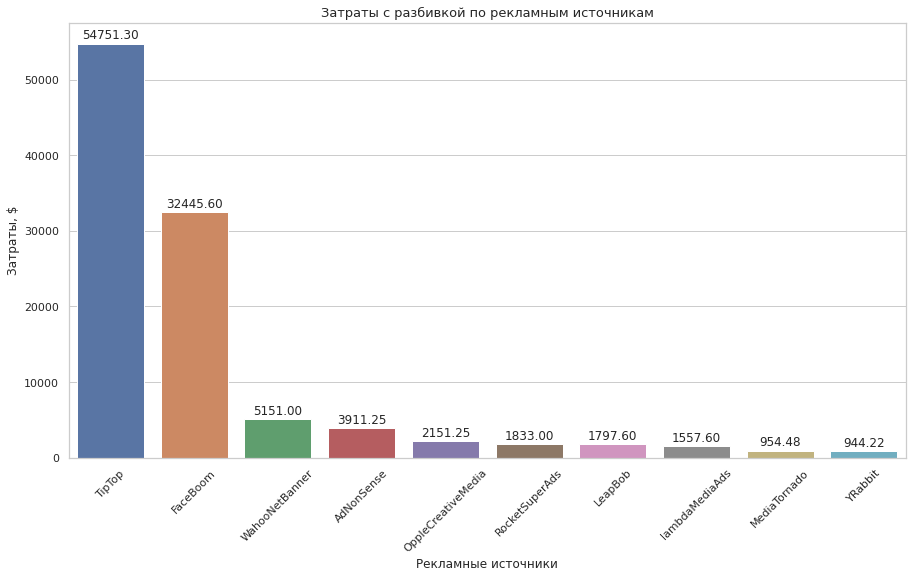

In [25]:
# построение графика суммы потраченных финансов с разбивкой по каналам привлечения
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='channel', y='sum_costs', data=costs_channel_breakdown)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Затраты с разбивкой по рекламным источникам', fontsize=13)
plt.xlabel('Рекламные источники', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Затраты, $', fontsize=12)
plt.show()

Выясним сколько финансов было потрачено на маркетинг с распределением по времени.

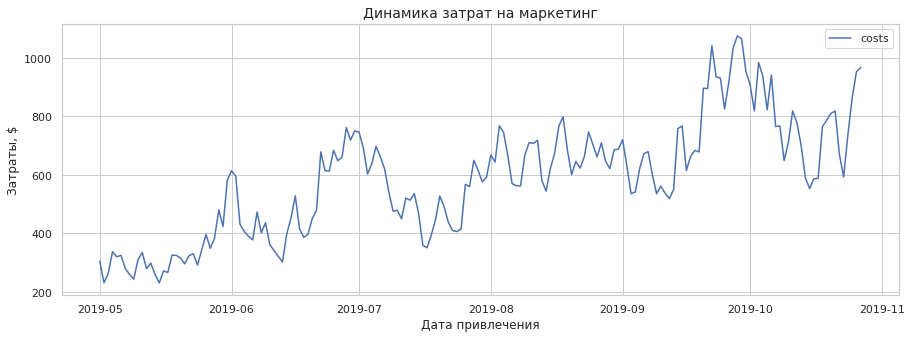

In [26]:
# формирование сводной таблицы c суммой потраченных финансов с разбивкой по дням
dynamic_costs = (
    costs.pivot_table(
        index='dt',  # даты первых посещений
        values='costs',  # траты на рекламный источник
        aggfunc='sum'  # сумма трат
    )
)

# построение графика суммы потраченных финансов с разбивкой по дням
dynamic_costs.plot(figsize=(15, 5), grid=True)
plt.title('Динамика затрат на маркетинг', fontsize=14)
plt.xlabel('Дата привлечения', fontsize=12)
plt.ylabel('Затраты, $', fontsize=12)
plt.show()

Теперь посмотрим как распределяются затраты на каждый рекламный канал в динамике.

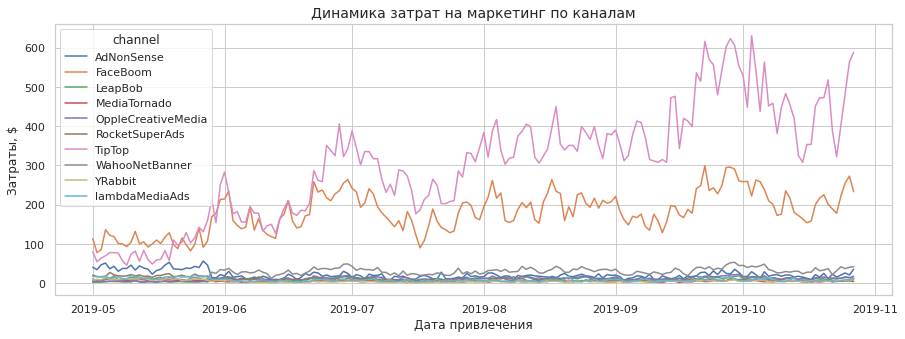

In [27]:
# формирование сводной таблицы c распределением потраченных финансов по каналам в динамике
dynamic_costs_by_channel = (
    costs.pivot_table(
        index='dt',  # даты первых посещений
        columns='channel', # разбивка на рекламные каналы
        values='costs',  # траты на рекламный источник
        aggfunc='sum'  # сумма трат
    )
)

# построение графика суммы потраченных финансов с разбивкой по дням
dynamic_costs_by_channel.plot(figsize=(15, 5), grid=True)
plt.title('Динамика затрат на маркетинг по каналам', fontsize=14)
plt.xlabel('Дата привлечения', fontsize=12)
plt.ylabel('Затраты, $', fontsize=12)
plt.show()

Пришло время рассчитать сколько стоило привлечение одного пользователя. Для этого рассчитаем средний CAC (Customer Acquisition Cost) на одного пользователя для всего проекта.

In [28]:
print('Средний CAC на одного пользователя для всего проекта:', 
      round(profiles.loc[profiles['channel'] != 'organic', 'acquisition_cost'].mean(), 2), '$')

Средний CAC на одного пользователя для всего проекта: 1.13 $


Теперь рассчитаем средний CAC на одного пользователя для каждого источника трафика. Исключим из расчетов пользователей с органическим трафиком, так как мы за них не платим.

In [29]:
# формирование сводной таблицы cо средним CAC на одного пользователя для каждого источника трафика
mean_cac_channel_breakdown = (
    profiles.query('channel != "organic"').pivot_table(
        index='channel',  # рекламные источники
        values='acquisition_cost',  # траты на рекламный источник
        aggfunc='mean'  # среднее значение трат на рекламный источник
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'mean_cac'})
)
mean_cac_channel_breakdown['mean_cac'] = round(mean_cac_channel_breakdown['mean_cac'], 2)

mean_cac_channel_breakdown

,mean_cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Выясним, как меняется стоимость привлечения для каждого источника от когорты к когорте. Для этого построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построим по ней график истории изменений.

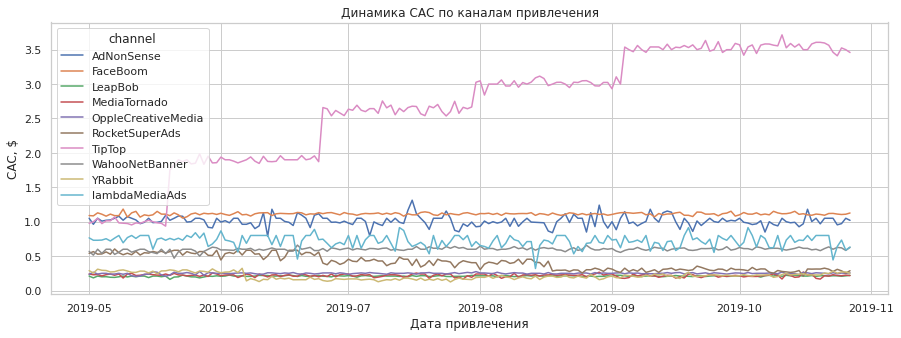

In [30]:
# строим график истории изменений CAC по каналам привлечения

profiles.query('channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

**Выводы**
- Удалось определить на какие источники было потрачено наибольшее количество средств:
    * TipTop - 51.9%,
    * FaceBoom - 30.8%
- Общие затраты на маркетинг растут на протяжении всего периода. Сезонность не наблюдается. Присутствует некоторый рост затрат в начале каждого месяца. Заметен пик в конце сентября, начале октября. Можно предположить, что это связано с попыткой улучшения показателей продаж, привлечения новых пользователей.
- Рассчитан средний CAC на одного пользователя для всего проекта и он составляет 1.13,
- Удалось топ-3 рекламных канала по величине среднего CAC:
    * TipTop - 2.8
    * FaceBoom - 1.11
    * AdNonSense - 1.01
- Величина среднего CAC растет по каналу TipTop на протяжении всего периода. По остальным каналам показатели стабильны. Это означает, что отдел маркетинга скорее всего считает это канал эффективным и периодически увеличивает траты на привлечение пользователей по нему. Необходимо посмотреть другие показатели по этому каналу для получения объективной картины.

## Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

Опишем проблемы. Ответим на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем и сформируем рекомендации для рекламного отдела. При решении этого шага считем, что мы смотрите данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Для начала необходимо установить момент и горизонт анализа данных. Нам известно, что мы смотрим данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [31]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

### Анализ общей окупаемости рекламы

Оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции `get_ltv()` и `plot_ltv_roi()`. Исключим из профилей инофрмацию по пользователям с органическим трафиком, так как мы за них не платим.

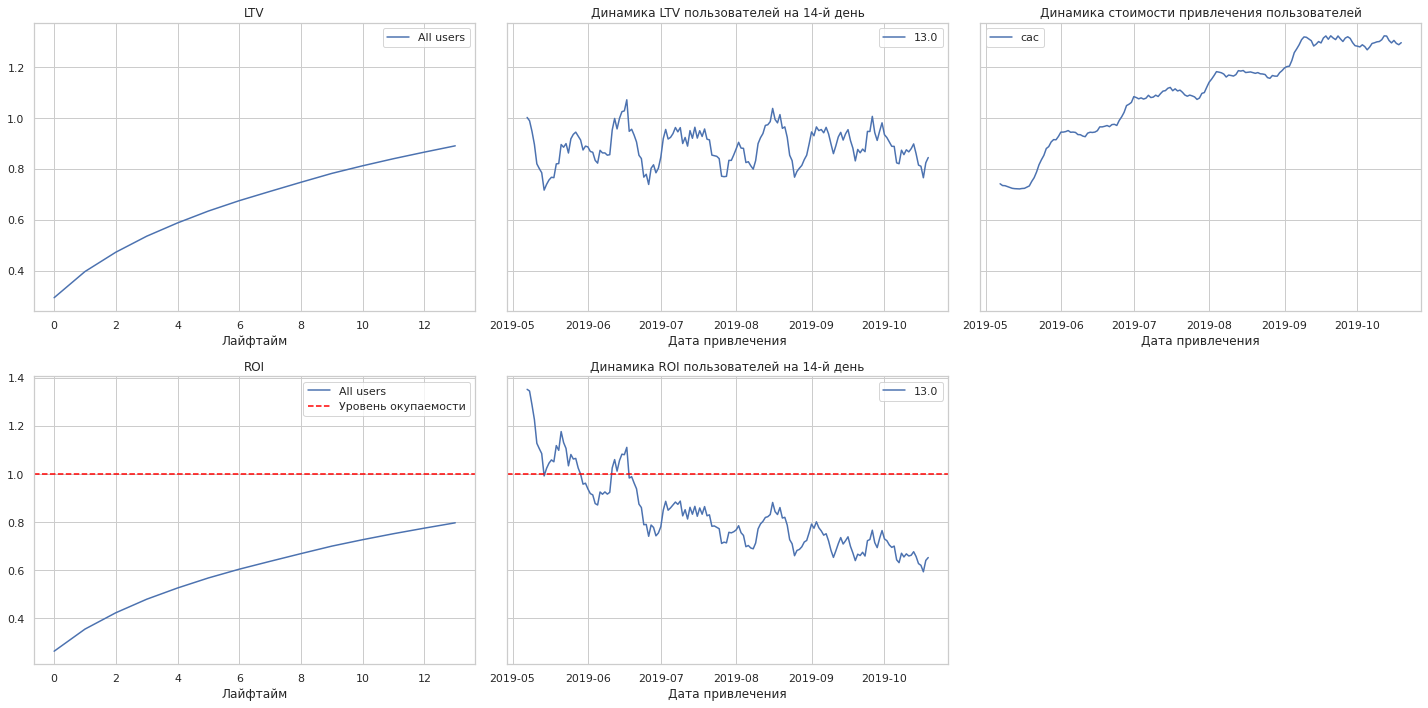

In [32]:
# сформируем вспомогательные профили пользователей без учета органического трафика
profiles_without_organic = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По графикам можно сделать такие выводы:**
- Кривая LTV постоянно растёт ожидаемым образом, показатель достаточно стабилен.
- Реклама практически не окупается. ROI в конце двухнедельного периода ниже уровня окупаемости. Динамика ROI постоянно снижается.
- CAC постоянно растет, это означает что рекламный бюджет постоянно увеличивается.

Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

### Анализ окупаемости рекламы с разбивкой по странам

Начнём с разбивки по странам: передадим параметру `dimensions` столбец `region`.

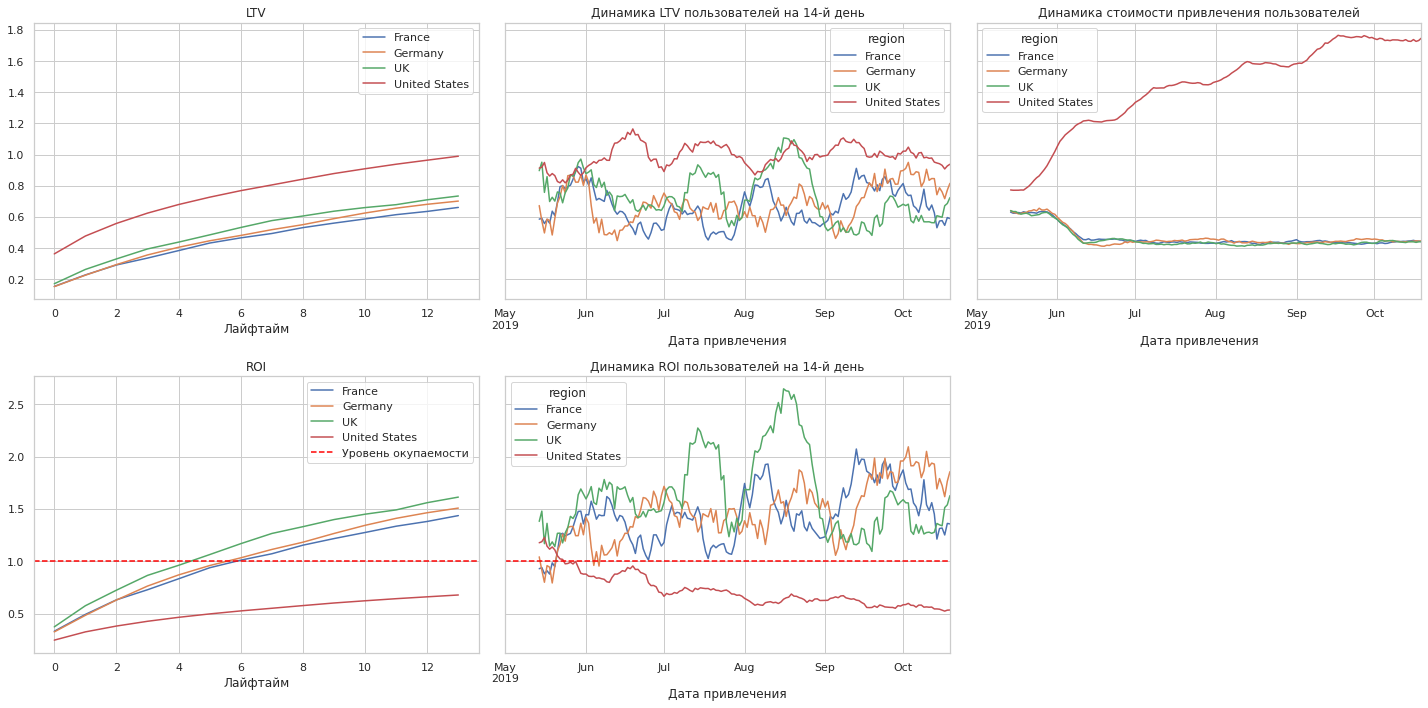

In [33]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вот что говорят графики:**
- Реклама окупается в Великобритании, Германии и Франции. Показатели хорошие.
- Есть явный аутсайдер, реклама в Соединенных Штатах не окупается. ROI ниже границы окупаемости.
- Стоимость привлечения стабильна и одинакова для Франции, Германии и Великобритании. Однако стоимость привлечения пользователей в Соединенных Штатах сильно выше и постоянно растёт.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Теперь проверим источники привлечения (channel).

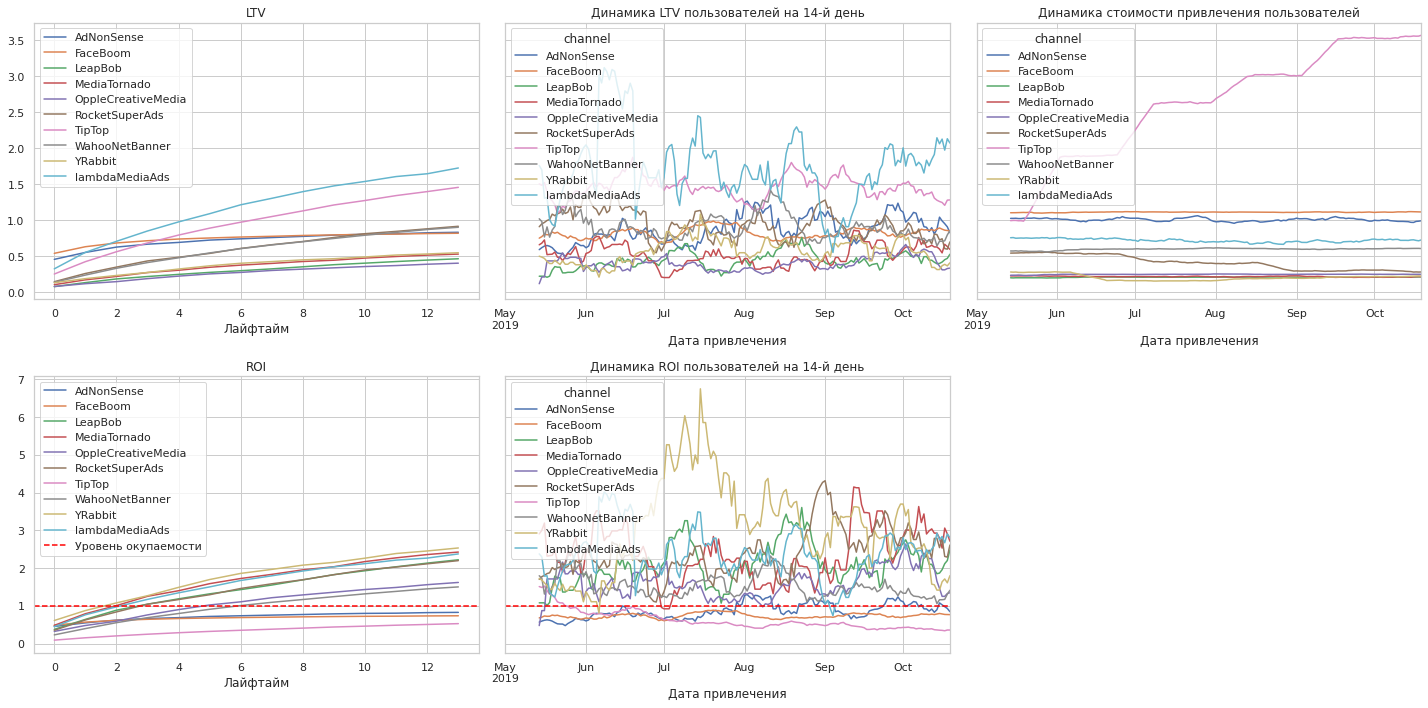

In [34]:
# смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

С разбивкой по каналам ситуация неоднозначная.

**Вот что говорят графики:**
- Есть явные аутсайдеры по рекламным каналам. Реклама не окупается на AdNonSense, FaceBoom и TipTop.
- На рост рекламного бюджета оказывает сильное влияние постоянно растущий CAC по каналу TipTop. У остальных каналов CAC стабилен.
- Лучше всего окупаются YRabbit, MediaTornado и lambdaMediaAds.

### Анализ окупаемости рекламы с разбивкой по устройствам

Перейдём к устройствам.

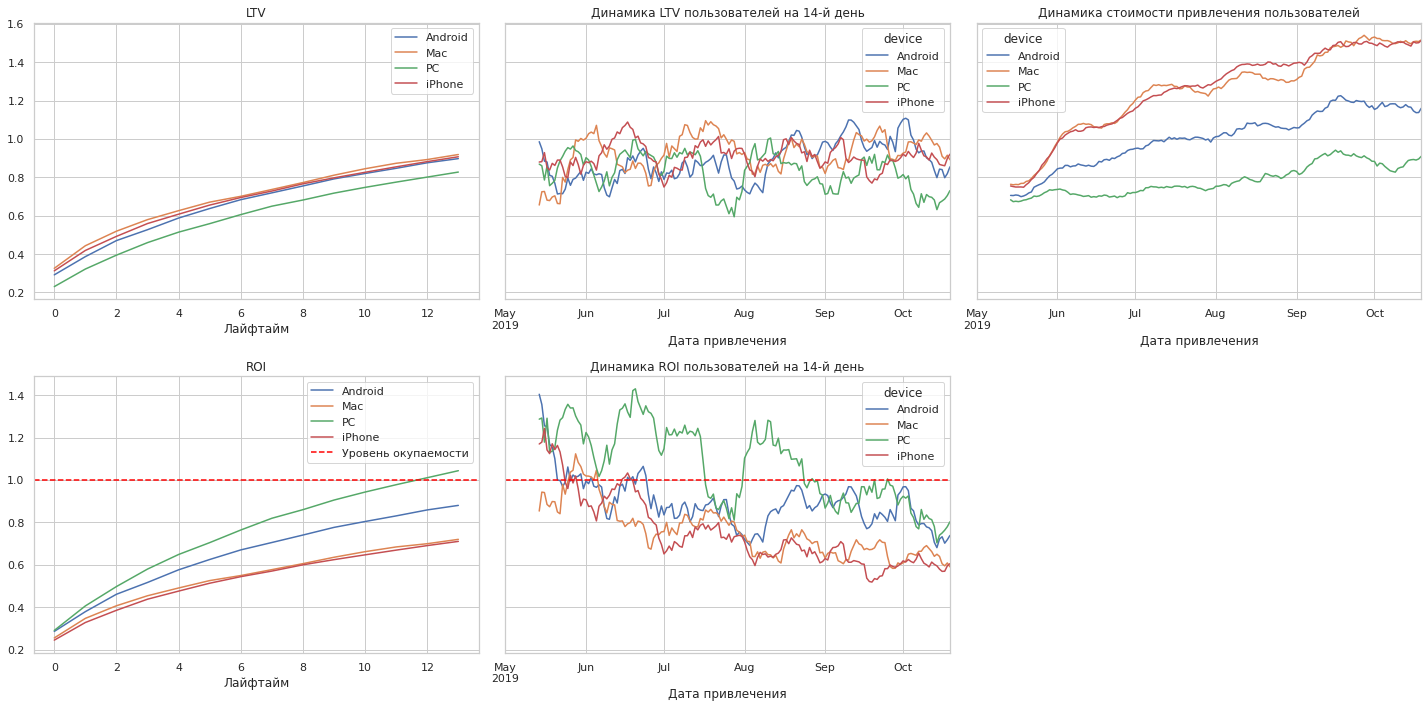

In [35]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вот что говорят графики:**
- Пользователи PC окупаются, владельцы iPhone, Mac и Android - нет.
- Рекламные бюджеты растут на всех устройствах, но на iPhone и Mac в особенности сильно.

**Выводы**

В ходе анализа окупаемости рекламы удалось выяснить следующее:
* Реклама не окупается, провальная рекламная компания в Соединенных Штатах (где сосредоточено 66.7% пользователей с наибольшей среди всех стран долей платящих пользователей) вносит коррективы в общие показатели. Также влияние оказывает покупка рекламы в AdNonSense, FaceBoom и TipTop, которая не окупается, хотя и дает в общей сложности 35% пользователей (из которых 11.1% платящие), как и пользователи iPhone, Mac и Android (79.7% пользователей, из которых 6.14% платящие).
* Рекламный бюджет постоянно растет, виновники практически те же: Соединенные Штаты, TipTop, iPhone и Mac. 

Узнаем, в чём причина: в низкой конверсии или низком удержании.
Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

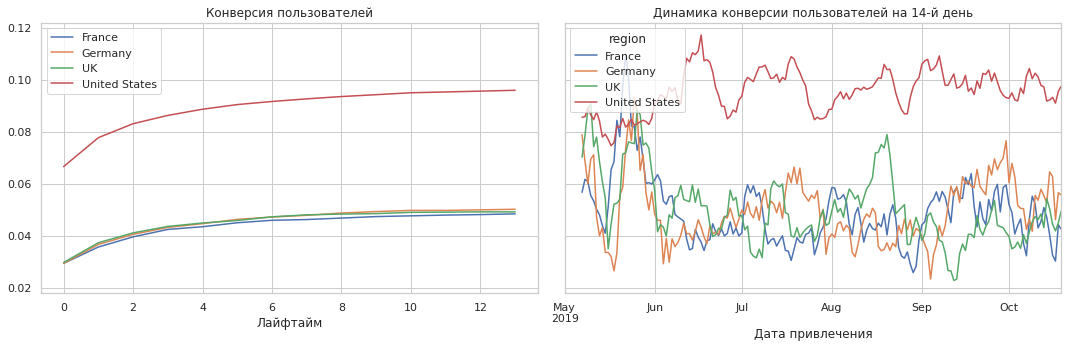

In [36]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи из Соединенных Штатов конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании. Вызовем функции `get_retention()` и `plot_retention()`, чтобы рассчитать и отразить на графиках этот показатель.

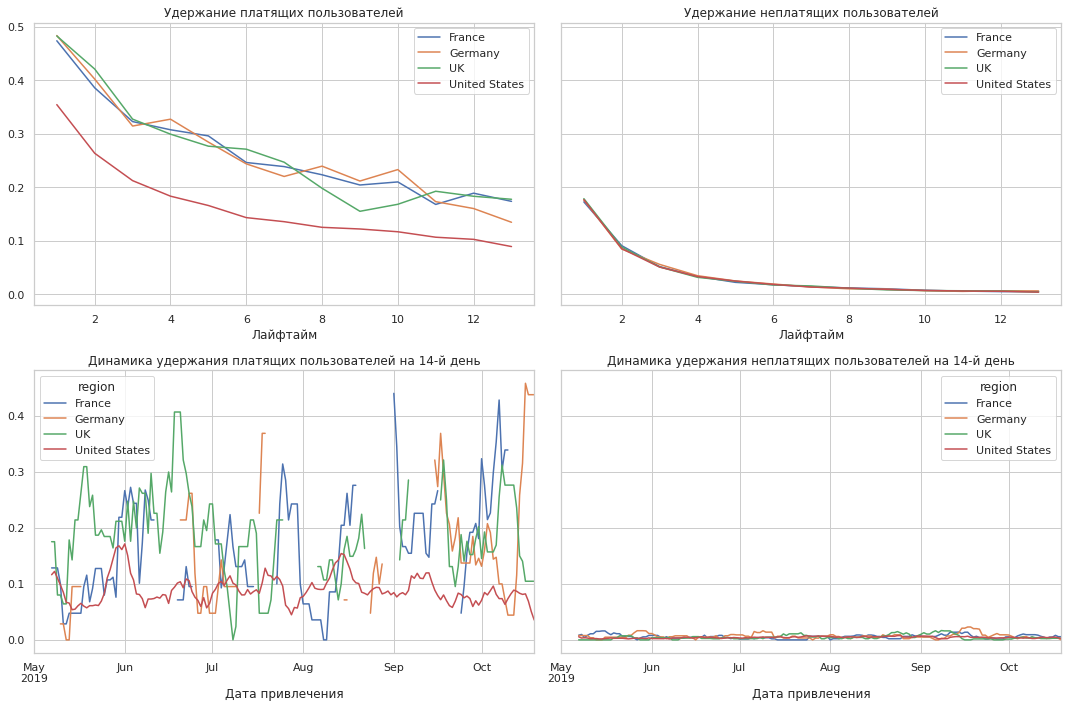

In [37]:
# смотрим удержание с разбивкой по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, пользователи из Соединенных Штатов удерживаются хуже чем пользователи из других стран. Возможно это связано с устройствами и каналами привлечения. Посмотрим конверсию и удержание с разбивкой по устройствам.

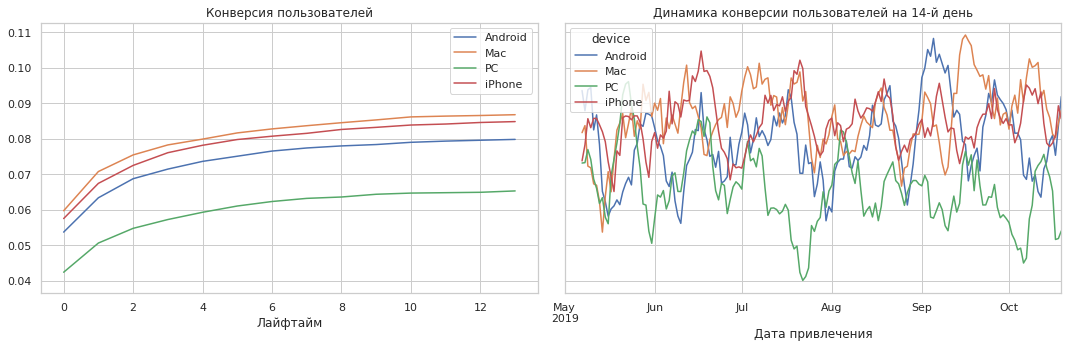

In [38]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи iPhone, Mac и Android конвертируются очень хорошо, причём постоянно. Скорее всего, дело в удержании. Вызовем функции `get_retention()` и `plot_retention()`, чтобы рассчитать и отразить на графиках этот показатель.

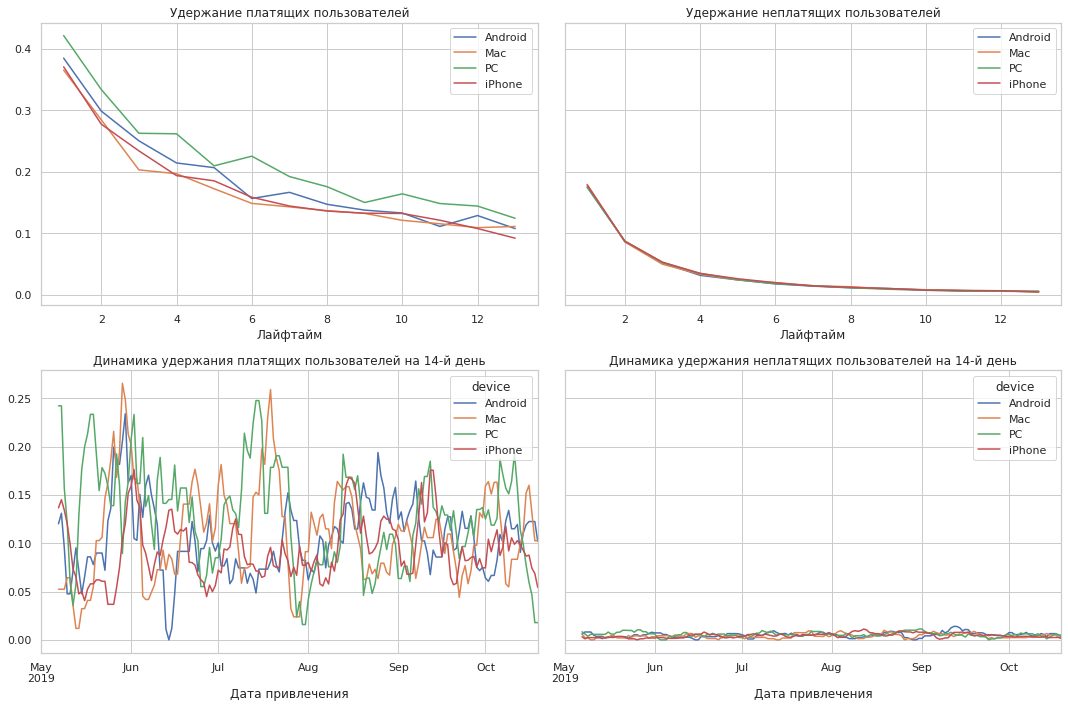

In [39]:
# смотрим удержание с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Здесь же, пользователи iPhone и Mac удерживаются абсолютно также как и пользователи Android и PC. Нам осталось проверить конверсию и удержание с разбивкой по рекламным каналам.

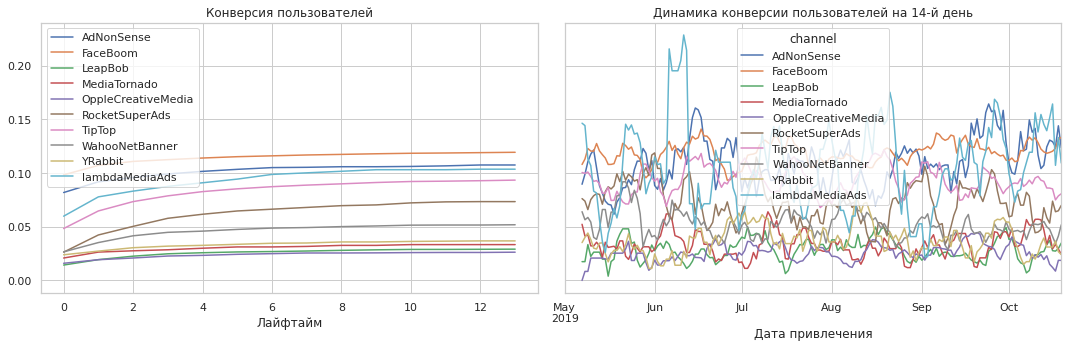

In [40]:
# смотрим конверсию с разбивкой по рекламным каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, конверсия по всем источникам хоть и низкая, но стабильная. У наших аутсайдеров AdNonSense, FaceBoom и TipTop показатели конверсии выше чем у других источников. Видимо, дело в удержании. Вызовем функции `get_retention()` и `plot_retention()`, чтобы рассчитать и отразить на графиках этот показатель.

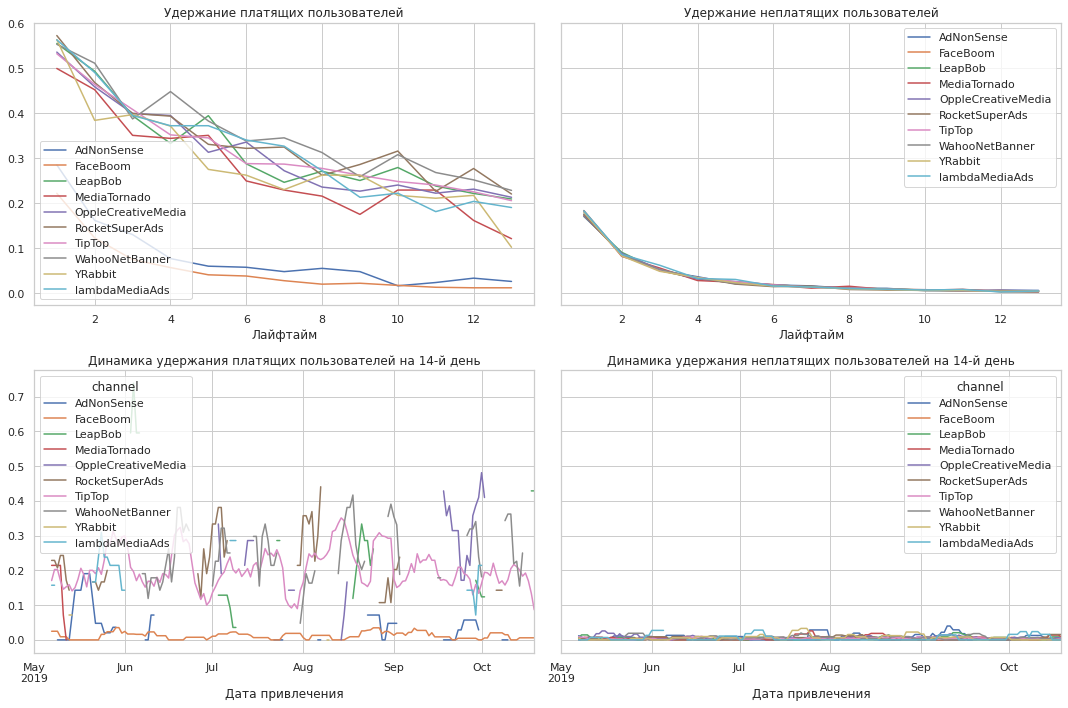

In [41]:
# смотрим удержание с разбивкой по рекламным каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вот мы и нашли основную причину - низкое удержание платящих пользователей, привлеченных при помощи AdNonSense и FaceBoom. Мы помним, что эти каналы не окупаются.

Проверим гипотезу о влиянии каналов привлечения пользователей в определенной стране. Для этого сформируем профили пользователей из США и по устройствам iPhone, Mac, Android и посмотрим на маркетинговые затраты в разрезе по рекламным каналам.

In [42]:
# сформируем вспомогательные профили пользователей из Соединенных Штатов
profiles_from_usa = profiles_without_organic.loc[profiles['region'] == 'United States']

# формирование сводной таблицы c суммой потраченных финансов с разбивкой по каналам привлечения
usa_costs_channel_breakdown = (
    profiles_from_usa.pivot_table(
        index='channel',  # рекламные источники
        values='acquisition_cost',  # траты на рекламный источник
        aggfunc='sum'  # сумма трат
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'sum_costs'})
)
usa_costs_channel_breakdown['total_ratio'] = round(
    usa_costs_channel_breakdown['sum_costs'] / 
    costs['costs'].sum(), 3)

usa_costs_channel_breakdown

,sum_costs,total_ratio
channel,,
TipTop,54751.30,0.519
FaceBoom,32445.60,0.308
RocketSuperAds,1833.00,0.017
MediaTornado,954.48,0.009
YRabbit,944.22,0.009


In [43]:
# сформируем вспомогательные профили пользователей с устройствами iPhone и Mac
apple_profiles = profiles_without_organic.loc[(profiles['device'] == 'iPhone') 
                                              | (profiles['device'] == 'Mac') |
                                              (profiles['device'] == 'Android')]

# формирование сводной таблицы c суммой потраченных финансов с разбивкой по каналам привлечения
apple_costs_channel_breakdown = (
    apple_profiles.pivot_table(
        index='channel',  # рекламные источники
        values='acquisition_cost',  # траты на рекламный источник
        aggfunc='sum'  # сумма трат
    )
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'sum_costs'})
)
apple_costs_channel_breakdown['sum_costs'] = round(
    apple_costs_channel_breakdown['sum_costs'], 2)
apple_costs_channel_breakdown['total_ratio'] = round(
    apple_costs_channel_breakdown['sum_costs'] / 
    costs['costs'].sum(), 3)

apple_costs_channel_breakdown

,sum_costs,total_ratio
channel,,
TipTop,49069.83,0.465
FaceBoom,29096.37,0.276
WahooNetBanner,3098.38,0.029
AdNonSense,2333.90,0.022
RocketSuperAds,1642.63,0.016
OppleCreativeMedia,1277.32,0.012
LeapBob,1082.79,0.010
lambdaMediaAds,937.08,0.009
MediaTornado,855.84,0.008


**Выводы**
- Наша гипотеза частично оказалась верна, 30.8% всего маркетингового бюджета ушло на неэффективный канал привлечения FaceBoom в Соединенных Штатах.
- 29.8% всего маркетингового бюджета ушло на неэффективные каналы привлечения FaceBoom и AdNonSense среди пользователей iPhone, Mac и Android.

## Общие выводы
- Выделим причины неэффективности привлечения пользователей;
- Сформируем рекомендации для отдела маркетинга для повышения эффективности.

В ходе исследования было выявлено, что:
- Реклама в Соединенных Штатах не окупается, несмотря на большое количество платящих пользователей (где сосредоточено 66.7% пользователей с наибольшей среди всех стран долей платящих пользователей), самые большие расходы на рекламу и высокую конверсию. Гипотеза о влиянии каналов привлечения пользователей оказалась частично верна, 30.8% всего маркетингового бюджета ушло на неэффективный канал привлечения FaceBoom.
- Реклама для пользователей iPhone, Mac и Android не окупается, однако здесь достаточно высокая конверсия и стабильное удержание. Также было определено, что 29.8% всего маркетингового бюджета ушло на неэффективные каналы привлечения FaceBoom и AdNonSense среди пользователей iPhone, Mac и Android.
- Основным фактором неэффективности привлечения пользователей является некорректный выбор каналов привлечения пользователей и трат на маркетинг. Поэтому рекомендации для отдела маркетинга для повышения эффективности могут быть следующие:
    * Отказаться от финансирования рекламных каналов AdNonSense и FaceBoom ввиду неокупаемости и плохого удержания пользователей, это позволит сэкономить 34.5% всего рекламного бюджета.
    * Увеличить финансирование рекламных каналов RocketSuperAds, WahooNetBanner и lambdaMediaAds ввиду хорошей окупаемости и хороших показателей конверсии, на текущий момент траты на эти каналы составляют 8.1% от всего рекламного бюджета.
    * Снизить финансирование канала TipTop, несмотря на хорошую конверсию и стабильное удержание. На него уходит 51.9% от всего рекламного бюджета. В идеале достичь показателя среднего CAC в районе 0.72, как у канала lambdaMediaAds, который имеет большую конверсию с сильно меньшими затратами.
    * После изменения рекламного бюджета сравнить показатели через 14 дней для дальнейших действий по оптимизации привлечения пользователей.